In [4]:
import numpy as np
from datascience import *

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Random Sampling

In [5]:
united = Table.read_table('united.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')
united

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


In [6]:
united.take(9)

Row,Date,Flight Number,Destination,Delay
9,6/1/15,317,IND,-10


### Deterministic Sample

In [7]:
united.where('Destination', 'JFK') 

Row,Date,Flight Number,Destination,Delay
26,6/1/15,502,JFK,-4
33,6/1/15,637,JFK,141
39,6/1/15,704,JFK,-8
50,6/1/15,758,JFK,-5
51,6/1/15,760,JFK,352
56,6/1/15,824,JFK,3
57,6/1/15,898,JFK,290
179,6/2/15,502,JFK,0
188,6/2/15,637,JFK,202
194,6/2/15,704,JFK,-11


Question: Why is this a deterministic sample?

### A Systematic Sample

In [8]:
np.arange(0, united.num_rows, 1000)

array([    0,  1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,
        9000, 10000, 11000, 12000, 13000])

In [9]:
united.take(np.arange(0, united.num_rows, 1000))

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1000,6/7/15,1692,EWR,7
2000,6/14/15,824,JFK,-1
3000,6/21/15,217,EWR,5
4000,6/27/15,1401,SAN,-4
5000,7/4/15,1614,LAS,-2
6000,7/11/15,401,CLE,4
7000,7/17/15,1645,IAD,0
8000,7/24/15,624,ORD,61
9000,7/30/15,1728,ORD,209


In [11]:
np.random.choice(1000)

784

In [12]:
united.take(np.arange(np.random.choice(1000), united.num_rows, 1000))

Row,Date,Flight Number,Destination,Delay
233,6/2/15,1185,EWR,59
1233,6/9/15,698,MCO,-3
2233,6/15/15,1927,IAH,13
3233,6/22/15,1273,OGG,34
4233,6/29/15,500,ORD,5
5233,7/6/15,1029,DFW,19
6233,7/12/15,1922,EWR,-6
7233,7/19/15,887,LAX,0
8233,7/25/15,1866,PHX,-4
9233,8/1/15,663,HNL,20


### A Random Sample

In [13]:
systematic_sample = united.take(np.random.choice(np.arange(1000), 5)) 
systematic_sample.show()

Row,Date,Flight Number,Destination,Delay
726,6/5/15,1673,IAD,51
690,6/5/15,1199,SEA,27
636,6/5/15,502,JFK,29
420,6/3/15,1645,IAD,-1
263,6/2/15,1583,EWR,0


### What's the probability of getting this sample?

What's the probability of getting three specific rows?

In [14]:
united.num_rows
(1 / united.num_rows) * (1 / united.num_rows - 1) * (1/ united.num_rows - 2)

0.00014464976542787286

Now let's extrapulate that to our sample of 5 rows

In [16]:
sample_size = 1 
total_probability = 1
for i in np.arange(sample_size):
    total_probability = total_probability * (1 / (united.num_rows - i))
total_probability

7.233273056057866e-05

In [17]:
def sample_probability(sample_size):
    total_probability = 1
    for i in np.arange(sample_size):
        total_probability = total_probability * (1 / (united.num_rows - i))
    return total_probability

sample_probability(1) > sample_probability(10)

True

(back to slides)

### Sample of convenience

In [ ]:
start = np.random.choice(np.arange(1000))
systematic_sample = ... 
systematic_sample.show()

<details>,
<summary>Solution</summary>
  united.take(np.arange(start, united.num_rows, 1000))
</details>


(back to slides)

# Distributions

In [18]:
die = Table().with_column('Face', np.arange(1, 7))
die

Face
1
2
3
4
5
6


### How can we take 10 samples of rolling a die

<details>,
<summary>Solution</summary>
  die.sample(10)
</details>

In [19]:
 # Hint: look at python reference for sampling form a table


Face
1
2
6
1
4
4
5
2
2
5


### Whats the initial probability of each side?


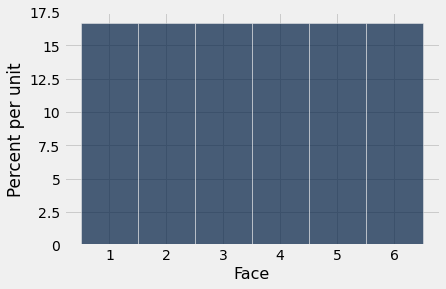

In [20]:
die.hist(bins=np.arange(0.5, 7.5, 1))

How did our sample fall out?

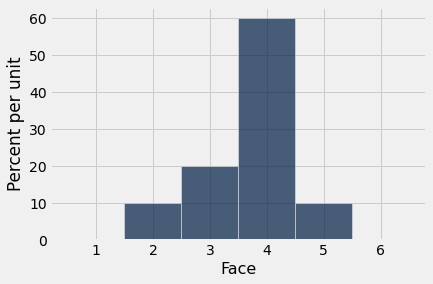

In [21]:
die.sample(10).hist(bins=np.arange(0.5, 7.5, 1))

(back to slides)

# Law of large numbers

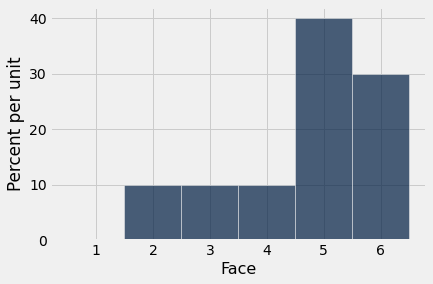

In [22]:
die.sample(10).hist(bins=np.arange(0.5, 7.5, 1))

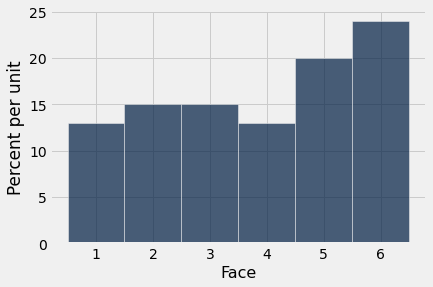

In [23]:
die.sample(100).hist(bins=np.arange(0.5, 7.5, 1))

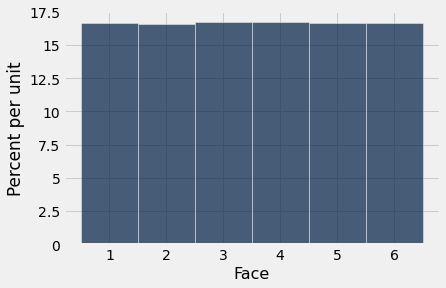

In [24]:
die.sample(int(1e6)).hist(bins=np.arange(0.5, 7.5, 1))

In [ ]:
die = np.arange(1,7)
die

### Let's roll a dice 10, 50, and 10,000 times and see the distribution of rolls

In [ ]:
for i in make_array(10, 50, 10000):
    Table().with_columns('roll', np.random.choice(die,i)).hist('roll', bins=np.arange(0.5,7.5, 1))

### Repeat the above multiple times and see the differences

(back to slides)
# Simulating Statistics 

### Average time of all delays

In [ ]:
np.median(united.column('Delay'))

### Average time of 10 random delays

In [ ]:
np.median(united.sample(10).column('Delay'))

In [ ]:
np.median(united.sample(10).column('Delay'))

#### Write a function that given a specified sample size called `size`, returns the median of those `size` samples

What type is `size` here?

In [ ]:
def sample_median(size):
    return ... 

<details>,
<summary>Solution</summary>
  np.median(united.sample(size).column('Delay'))
</details>


In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook()
grader.export("Lecture_11_completed.ipynb", pdf=False)